### CarPrice Project
1. Exploration
1. Regression
2. Classification with decision tree
3. 

In [1]:
# Importing libraries for data handling
import pandas as pd
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# To load the CSV file (adjust the name and path of your file)
cardata = pd.read_csv('CarPrice.csv')  # Replace 'file_name.csv' with your actual file name


# Exploring the File 
## General  Observations
1.  Shape  256, 26
2.  ffdfgdfg
3.  gdfgdfg
----------------------------


In [2]:
cardata = pd.read_csv('CarPrice.csv')
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#Check the data
cardata.shape

(205, 26)

In [8]:
# Info and Describe 
cardata.info()
cardata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
cardata.duplicated().sum()

0

In [10]:
# Sort columns by data type
sorted_dtypes = cardata.dtypes.sort_values()

# Display the sorted data types
print(sorted_dtypes)


car_ID                int64
symboling             int64
citympg               int64
peakrpm               int64
horsepower            int64
enginesize            int64
curbweight            int64
highwaympg            int64
compressionratio    float64
stroke              float64
boreratio           float64
carheight           float64
carlength           float64
wheelbase           float64
carwidth            float64
price               float64
enginetype           object
cylindernumber       object
enginelocation       object
fuelsystem           object
drivewheel           object
carbody              object
doornumber           object
aspiration           object
fueltype             object
CarName              object
dtype: object


In [13]:
# Filter the DataFrame for only object type columns
object_columns = cardata.select_dtypes(include='object')

# Display the columns names
object_columns.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [14]:
# Filter rows where 'CarName' contains 'Toy' or 'TOYO' (case insensitive)
filtered_cars = cardata[cardata['CarName'].str.contains('Toy|TOYO', case=False, na=False)]

# Display the filtered rows
print(filtered_cars)

# Count the number of filtered rows
count_filtered = filtered_cars.shape[0]
print(f"Number of filtered rows: {count_filtered}")


     car_ID  symboling                    CarName fueltype aspiration  \
150     151          1      toyota corona mark ii      gas        std   
151     152          1              toyota corona      gas        std   
152     153          1        toyota corolla 1200      gas        std   
153     154          0      toyota corona hardtop      gas        std   
154     155          0   toyota corolla 1600 (sw)      gas        std   
155     156          0              toyota carina      gas        std   
156     157          0             toyota mark ii      gas        std   
157     158          0        toyota corolla 1200      gas        std   
158     159          0              toyota corona   diesel        std   
159     160          0             toyota corolla   diesel        std   
160     161          0              toyota corona      gas        std   
161     162          0             toyota corolla      gas        std   
162     163          0             toyota mark ii  

#There are 32 Toyota Cars and all are the label "toyota"

In [27]:
# Create a new 'Make' column based on the condition in 'CarName'
cardata['Make'] = cardata['CarName'].apply(lambda x: 'Toyota' if pd.Series(x).str.contains('toyota|toyouta', case=False, na=False).any() else 'Other')

# Display the updated DataFrame to verify the result
print(cardata[['CarName', 'Make']].head(-20))  # Display the first 20 rows to verify the result

                          CarName    Make
0              alfa-romero giulia   Other
1             alfa-romero stelvio   Other
2        alfa-romero Quadrifoglio   Other
3                     audi 100 ls   Other
4                      audi 100ls   Other
..                            ...     ...
180                toyota starlet  Toyota
181                toyouta tercel  Toyota
182              vokswagen rabbit   Other
183  volkswagen 1131 deluxe sedan   Other
184          volkswagen model 111   Other

[185 rows x 2 columns]


In [28]:
# Count unique values in the 'Make' column
make_counts = cardata['Make'].value_counts()

# Display the result
print(make_counts)

Make
Other     173
Toyota     32
Name: count, dtype: int64


In [29]:
#Check the data
cardata.shape

(205, 27)

In [62]:
# Crear una nueva columna 'Country' basada en la columna 'CarName'
cardata['Country'] = cardata['CarName'].apply(lambda x: 'Japan' 
                                              if any(brand in x.lower() for brand in ['toyota', 'toyouta', 'mazda', 'maxda', 'honda', 'isuzu', 'nissan', 'subaru']) 
                                              else 'Other')

# Mostrar el DataFrame actualizado para verificar el resultado
print(cardata[['CarName', 'Make', 'Country']].head(100))  # Mostrar las primeras 20 filas para verificar el resultado




                     CarName   Make Country
0         alfa-romero giulia  Other   Other
1        alfa-romero stelvio  Other   Other
2   alfa-romero Quadrifoglio  Other   Other
3                audi 100 ls  Other   Other
4                 audi 100ls  Other   Other
..                       ...    ...     ...
95               nissan juke  Other   Japan
96              nissan latio  Other   Japan
97               nissan note  Other   Japan
98            nissan clipper  Other   Japan
99              nissan rogue  Other   Japan

[100 rows x 3 columns]


In [63]:
# Group by 'Country' and 'Make' to get the frequency counts
country_make_freq = cardata.groupby(['Country', 'Make']).size().reset_index(name='Frequency')

# Display the result
print(country_make_freq)

  Country    Make  Frequency
0   Japan   Other         65
1   Japan  Toyota         32
2   Other   Other        108


In [32]:
#Check the data
cardata.shape

(205, 28)

In [36]:

# Filter the DataFrame to show only rows where 'Make' is 'Toyota' and display the 'CarSize' column
toyota_subset = cardata[cardata['Make'] == 'Toyota'][['Make', 'enginesize', 'fueltype', 'carbody', 'price']]

# Display the result
print(toyota_subset)

# Count unique values in the 'Make' column
toyota_counts = toyota_subset['Make'].value_counts()

# Display the result
print(toyota_counts)

       Make  enginesize fueltype      carbody    price
150  Toyota          92      gas    hatchback   5348.0
151  Toyota          92      gas    hatchback   6338.0
152  Toyota          92      gas    hatchback   6488.0
153  Toyota          92      gas        wagon   6918.0
154  Toyota          92      gas        wagon   7898.0
155  Toyota          92      gas        wagon   8778.0
156  Toyota          98      gas        sedan   6938.0
157  Toyota          98      gas    hatchback   7198.0
158  Toyota         110   diesel        sedan   7898.0
159  Toyota         110   diesel    hatchback   7788.0
160  Toyota          98      gas        sedan   7738.0
161  Toyota          98      gas    hatchback   8358.0
162  Toyota          98      gas        sedan   9258.0
163  Toyota          98      gas        sedan   8058.0
164  Toyota          98      gas    hatchback   8238.0
165  Toyota          98      gas        sedan   9298.0
166  Toyota          98      gas    hatchback   9538.0
167  Toyot

In [65]:
# Calculate the mean, median, and mode for the 'EngineSize' column
mean_enginesize = cardata['enginesize'].mean()
median_enginesize = cardata['enginesize'].median()
mode_enginesize = cardata['enginesize'].mode()[0]  # mode() returns a series, so we take the first value

# Display the results
print(f"Mean of EngineSize: {mean_enginesize}")
print(f"Median of EngineSize: {median_enginesize}")
print(f"Mode of EngineSize: {mode_enginesize}")


Mean of EngineSize: 126.90731707317073
Median of EngineSize: 120.0
Mode of EngineSize: 92


In [39]:
# Create a new 'Engine123' column based on the 'enginesize' column
cardata['Engine123'] = cardata['enginesize'].apply(lambda x: 'Large' if x >=123 else 'Small')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'Engine123']].head(-50))  # rows to verify the result

       Make Engine123
0     Other     Large
1     Other     Large
2     Other     Large
3     Other     Small
4     Other     Large
..      ...       ...
150  Toyota     Small
151  Toyota     Small
152  Toyota     Small
153  Toyota     Small
154  Toyota     Small

[155 rows x 2 columns]


In [42]:
# Create a new 'Sedan' column based on the 'enginesize' column
cardata['Sedan'] = cardata['carbody'].apply(lambda x: 'Sedan' if x == 'sedan'  else 'Other')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'Sedan']].head(-48))   # rows to verify the result



       Make  Sedan
0     Other  Other
1     Other  Other
2     Other  Other
3     Other  Sedan
4     Other  Sedan
..      ...    ...
152  Toyota  Other
153  Toyota  Other
154  Toyota  Other
155  Toyota  Other
156  Toyota  Sedan

[157 rows x 2 columns]


In [43]:
# Calculate the mean, median, and mode for the 'price' column
mean_price = cardata['price'].mean()
median_price = cardata['price'].median()
mode_price = cardata['price'].mode()[0]  # mode() returns a series, so we take the first value

# Display the results
print(f"Mean of Price: {mean_price}")
print(f"Median of Price: {median_price}")
print(f"Mode of Price: {mode_price}")


Mean of Price: 13276.710570731706
Median of Price: 10295.0
Mode of Price: 5572.0


In [44]:
# Create a new 'pricerange' column based on the 'price' column
cardata['pricerange'] = cardata['price'].apply(lambda x: 'Low' if x <= 13500  else 'High')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'pricerange']].head(-48))   # rows to verify the result


       Make pricerange
0     Other        Low
1     Other       High
2     Other       High
3     Other       High
4     Other       High
..      ...        ...
152  Toyota        Low
153  Toyota        Low
154  Toyota        Low
155  Toyota        Low
156  Toyota        Low

[157 rows x 2 columns]


#DataFrame for the Decision Tree

In [45]:
# Sort columns by data type
sorted_dtypes = cardata.dtypes.sort_values()

# Display the sorted data types
print(sorted_dtypes)


car_ID                int64
symboling             int64
enginesize            int64
horsepower            int64
curbweight            int64
highwaympg            int64
citympg               int64
peakrpm               int64
compressionratio    float64
carheight           float64
carwidth            float64
wheelbase           float64
stroke              float64
price               float64
carlength           float64
boreratio           float64
Make                 object
Country              object
Engine123            object
cylindernumber       object
Sedan                object
enginetype           object
enginelocation       object
drivewheel           object
carbody              object
doornumber           object
aspiration           object
fueltype             object
CarName              object
fuelsystem           object
pricerange           object
dtype: object


In [67]:
# Subset for the analysis 
toyota_recode = cardata[['car_ID','Country', 'Engine123', 'Sedan','pricerange','Make']]

# Display the result
print(toyota_recode)

# Count unique values in the 'Make' column
recode_counts = toyota_recode ['Make'].value_counts()
recode_counts1 = toyota_recode ['Country'].value_counts()

# Display the result
print(recode_counts)
print(recode_counts1)

     car_ID Country Engine123  Sedan pricerange   Make
0         1   Other     Large  Other        Low  Other
1         2   Other     Large  Other       High  Other
2         3   Other     Large  Other       High  Other
3         4   Other     Small  Sedan       High  Other
4         5   Other     Large  Sedan       High  Other
..      ...     ...       ...    ...        ...    ...
200     201   Other     Large  Sedan       High  Other
201     202   Other     Large  Sedan       High  Other
202     203   Other     Large  Sedan       High  Other
203     204   Other     Large  Sedan       High  Other
204     205   Other     Large  Sedan       High  Other

[205 rows x 6 columns]
Make
Other     173
Toyota     32
Name: count, dtype: int64
Country
Other    108
Japan     97
Name: count, dtype: int64


In [51]:
# Info and Describe 
toyota_recode.info()
toyota_recode.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car_ID      205 non-null    int64 
 1   Country     205 non-null    object
 2   Engine123   205 non-null    object
 3   Sedan       205 non-null    object
 4   pricerange  205 non-null    object
 5   Make        205 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.7+ KB


,car_ID
count,205.000000
mean,103.000000
std,59.322565
min,1.000000
25%,52.000000
50%,103.000000
75%,154.000000
max,205.000000


In [72]:
# Create encoder for 'Make', 'PriceRange', 'Sedan', 'Engine123' y 'Country'
cardata['toyota_encoder'] = cardata['Make'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)
cardata['PriceRange_encoder'] = cardata['pricerange'].apply(lambda x: 1 if x.lower() == 'low' else 0)
cardata['Sedan_encoder'] = cardata['Sedan'].apply(lambda x: 1 if x.lower() == 'sedan' else 0)
cardata['Engine123_encoder'] = cardata['Engine123'].apply(lambda x: 1 if x.lower() == 'small' else 0)
cardata['Country_encoder'] = cardata['Country'].apply(lambda x: 1 if x.lower() == 'japan' else 0)

# Display the result
print(cardata.iloc[:20, -10:])

     Make Country Engine123  Sedan pricerange  toyota_encoder  \
0   Other   Other     Large  Other        Low               0   
1   Other   Other     Large  Other       High               0   
2   Other   Other     Large  Other       High               0   
3   Other   Other     Small  Sedan       High               0   
4   Other   Other     Large  Sedan       High               0   
5   Other   Other     Large  Sedan       High               0   
6   Other   Other     Large  Sedan       High               0   
7   Other   Other     Large  Other       High               0   
8   Other   Other     Large  Sedan       High               0   
9   Other   Other     Large  Other       High               0   
10  Other   Other     Small  Sedan       High               0   
11  Other   Other     Small  Sedan       High               0   
12  Other   Other     Large  Sedan       High               0   
13  Other   Other     Large  Sedan       High               0   
14  Other   Other     Lar

In [73]:
#Check the data
cardata.shape

(205, 36)

In [75]:
# Subset for the analysis 
toyota_encoder = cardata[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder','PriceRange_encoder','toyota_encoder']]

# Display the result
print(toyota_encoder)

# Count unique values in the 'Make' column
make_counts = toyota_encoder['toyota_encoder'].value_counts()
country_counts = toyota_encoder ['Country_encoder'].value_counts()

# Display the result
print(make_counts )
print(country_counts)

     Country_encoder  Engine123_encoder  Sedan_encoder  PriceRange_encoder  \
0                  0                  0              0                   1   
1                  0                  0              0                   0   
2                  0                  0              0                   0   
3                  0                  1              1                   0   
4                  0                  0              1                   0   
..               ...                ...            ...                 ...   
200                0                  0              1                   0   
201                0                  0              1                   0   
202                0                  0              1                   0   
203                0                  0              1                   0   
204                0                  0              1                   0   

     toyota_encoder  
0                 0  
1                 0

In [77]:
# Create binary target: 1 if Make is Toyota, 0 otherwise
toyota_encoder.loc[:, 'Target'] = toyota_encoder['toyota_encoder'].apply(lambda x: 1 if x == 1 else 0)


# Function to calculate Gini Impurity for a given feature
def gini_impurity(series):
    # Get the value counts of the target variable (0 and 1) for each unique value in the feature
    value_counts = series.value_counts(normalize=True)
    
    # Gini impurity calculation
    gini = 1 - sum(value_counts**2)
    return gini

# List of features to analyze
features = ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder','PriceRange_encoder']

# Calculate Gini Impurity for each feature
gini_results = {feature: gini_impurity(toyota_encoder[feature]) for feature in features}

# Convert the results to a DataFrame for better formatting and sorting
gini_df = pd.DataFrame(list(gini_results.items()), columns=['Feature', 'Gini Impurity'])

# Sort by Gini Impurity in ascending order and round to 2 decimal places
gini_df = gini_df.sort_values(by='Gini Impurity').round(2)

# Display the sorted table
print(gini_df)

              Feature  Gini Impurity
3  PriceRange_encoder           0.45
1   Engine123_encoder           0.46
2       Sedan_encoder           0.50
0     Country_encoder           0.50


In [81]:
toyota_encoder.shape

(205, 6)

In [79]:
# Group by 'Country' and 'Make' to get the frequency counts
country_make_freq = toyota_encoder.groupby(['Country_encoder', 'toyota_encoder']).size().reset_index(name='Frequency')

# Display the result
print(country_make_freq)


   Country_encoder  toyota_encoder  Frequency
0                0               0        108
1                1               0         65
2                1               1         32


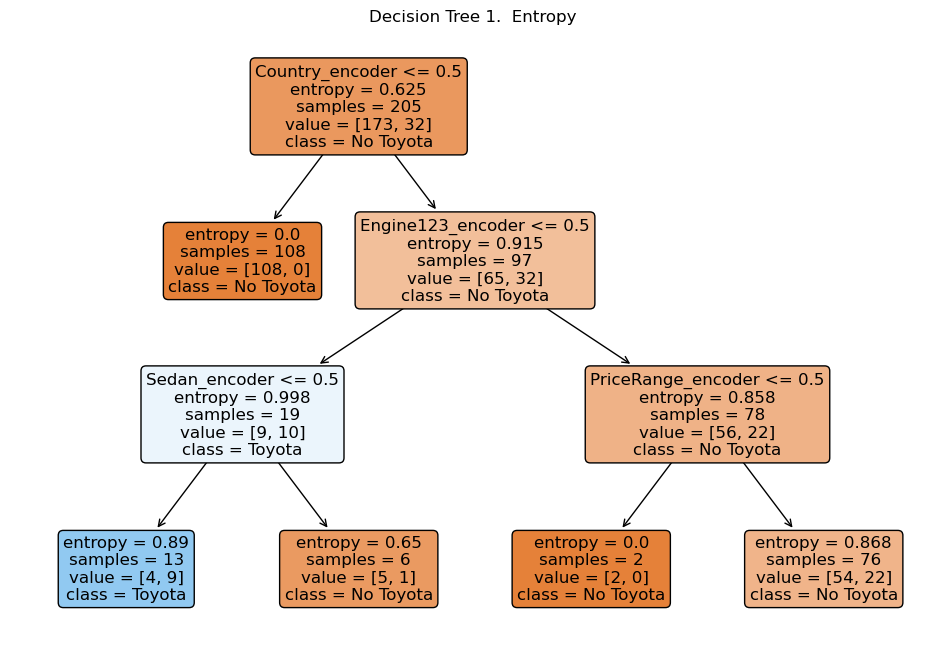

Accuracy: 0.8683


In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features: ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
# Target: 'toyota_encoder' (1 para Toyota, 0 para otros)

# select Features and target
X = toyota_encoder[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']]  #  Features
y = toyota_encoder['toyota_encoder']  # Target (1  Toyota, 0  other)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)  # max_depth para evitar sobreajuste
dtree.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree 1.  Entropy ")
plt.show()

# Evaluar la precisión del modelo
accuracy = dtree.score(X, y)

# Imprimir la precisión
print(f"Accuracy: {accuracy:.4f}")

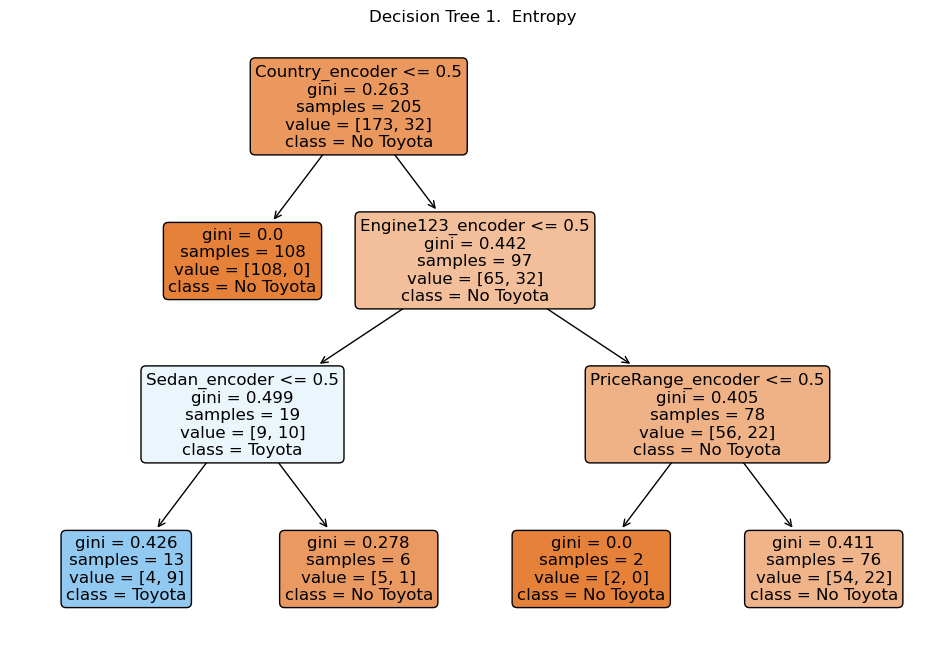

Accuracy: 0.8683


In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features: ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
# Target: 'toyota_encoder' (1 para Toyota, 0 para otros)

# select Features and target
X = toyota_encoder[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']]  #  Features
y = toyota_encoder['toyota_encoder']  # Target (1  Toyota, 0  other)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # max_depth para evitar sobreajuste
dtree.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree 1.  Entropy ")
plt.show()

# Evaluar la precisión del modelo
accuracy = dtree.score(X, y)

# Imprimir la precisión
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8682926829268293


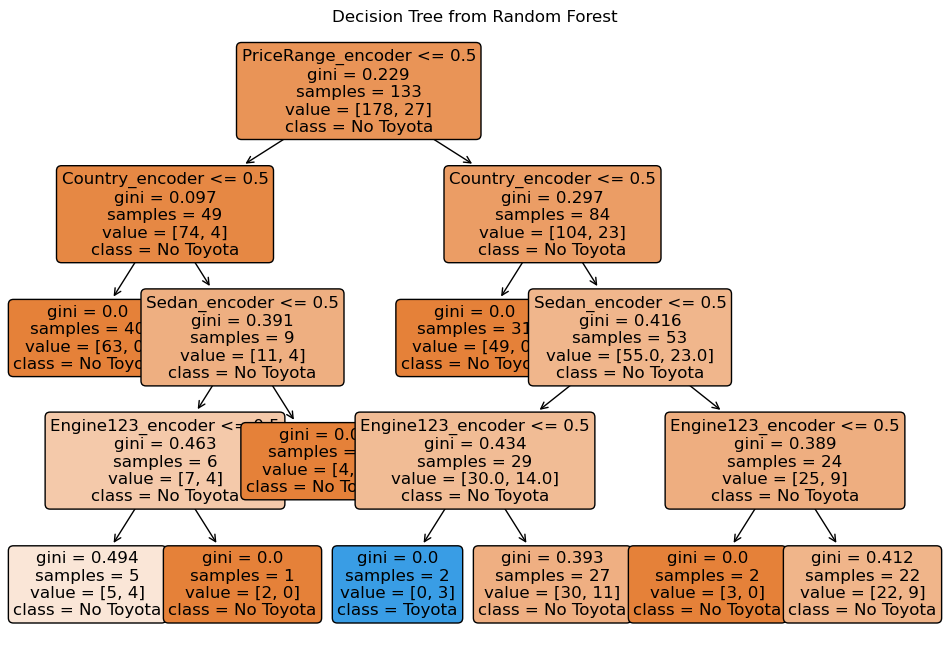

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador de Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Entrenar el modelo
rf.fit(X, y)

# Evaluar el modelo
print(f"Accuracy: {rf.score(X, y)}")

# Graficar uno de los árboles del Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree from Random Forest")
plt.show()


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el clasificador de Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
gb.fit(X, y)

# Evaluar el modelo
print(f"Accuracy: {gb.score(X, y)}")


Accuracy: 0.8682926829268293


In [88]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convertir los datos a DMatrix, que es el formato optimizado de XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Parámetros del modelo
params = {
    'objective': 'binary:logistic',  # Problema de clasificación binaria
    'eval_metric': 'logloss',        # Medición de pérdida
    'max_depth': 3,                  # Profundidad máxima de los árboles
    'eta': 0.1                       # Tasa de aprendizaje
}

# Entrenar el modelo
bst = xgb.train(params, dtrain, num_boost_round=100)

# Hacer predicciones
preds = bst.predict(dtrain)
preds = [1 if p > 0.5 else 0 for p in preds]

# Evaluar el modelo
accuracy = accuracy_score(y, preds)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8682926829268293


## Resumen:
*Random Forests*: Promedia los resultados de muchos árboles, mejora la precisión y reduce el sobreajuste.
*Gradient Boosting*: Construye árboles de manera secuencial, corrigiendo los errores de los árboles anteriores.
*XGBoost*: Variante más eficiente y optimizada de Gradient Boosting.
*LightGBM*: Similar a XGBoost, pero más eficiente en términos de memoria y velocidad.
*CatBoost*: Excelente para manejar características categóricas sin necesidad de codificación.

In [97]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [98]:
# Evaluar la precisión en el conjunto de prueba
accuracy = dtree.score(X_test, y_test)

# Imprimir la precisión
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")


Accuracy en el conjunto de prueba: 0.8537


In [99]:
# Probar diferentes valores para max_depth y min_samples_split
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [100]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(dtree, X, y, cv=5)  # cv=5 significa 5 particiones

# Imprimir la precisión promedio de la validación cruzada
print(f"Promedio de precisión en validación cruzada: {scores.mean():.4f}")


Promedio de precisión en validación cruzada: 0.8390


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones en el conjunto de prueba
y_pred = dtree.predict(X_test)

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión:\n{conf_matrix}")


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       1.00      0.14      0.25         7

    accuracy                           0.85        41
   macro avg       0.93      0.57      0.58        41
weighted avg       0.88      0.85      0.80        41

Matriz de confusión:
[[34  0]
 [ 6  1]]


## Confusion Matriz
TN, FP
FN, TP

34  TN  NO TOYOTA
0   FP  NO TOYOPA, Actually  TOYOTA
6   FN  Actually Toyota but classify as not toyota 
1   TP   Actually toyota and clasify as totoya

Presicion.  Lo que debe de hacer 
34 TN  + 1 TP  entre total 41  = 85%  en diagonal

Recall 



In [ ]:
Resumen de lo que hicimos:
Dividir los datos en conjuntos de entrenamiento y prueba.
Entrenar el modelo con el conjunto de entrenamiento.
Evaluar la precisión en el conjunto de prueba.
Mejorar el modelo utilizando técnicas como el ajuste de hiperparámetros, validación cruzada, preprocesamiento, y exploración de otros algoritmos como Random Forest.